In [1]:
from intercode import Intercode

import scanpy as sc
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (7, 7)
mpl.rcParams['figure.dpi'] = 100

### Load and preprocess data

In [3]:
# preprocessed Kang18 dataset (log transformed, highly variable genes) 
# with reactome annotations in adata.varm['I']
# download dataset - https://drive.google.com/file/d/1BWdDg4mW0wSvZxDFMh0EcG-gLGQ5PllN/view?usp=sharing
adata = sc.read('kang_count_proc.h5ad')

In [5]:
select_genes = adata.varm['I'].sum(1)>0
adata._inplace_subset_var(select_genes)
adata.X-=adata.X.mean(0)

### Get intercode latent representation

In [6]:
LR = 0.001
BATCH_SIZE = 62
N_EPOCHS = 80

# regularization hyperparameters
# lambda0 - page 19 of presentation
# lambdas 1-3 - last term on page 20

LAMBDA0 = 0.1

LAMBDA1 = 0.93
LAMBDA3 = 0.57

In [7]:
intercode = Intercode(adata)
# n_sparse - number of sparse terms, corresponding l1 regularization hyperparameter - lambda2
# n_dense - number of dense terms

In [8]:
intercode.train(LR, BATCH_SIZE, N_EPOCHS, l2_reg_lambda0=LAMBDA0, lambda1=LAMBDA1, lambda3=LAMBDA3)

Sending the whole dataset to cuda
Epoch: 0 | batch train loss: 379.5331
Epoch: 0 | batch train loss: 65.3090
Epoch: 0 | batch train loss: 63.9262
Epoch: 0 -- total train loss:  63.0898=57.9296+5.1601
Number of deactivated terms: 0
Share of deactivated inactive genes: 0.9528
Epoch: 1 | batch train loss: 64.4210
Epoch: 1 | batch train loss: 61.3841
Epoch: 1 | batch train loss: 56.1813
Epoch: 1 -- total train loss:  56.8145=52.0031+4.8114
Number of deactivated terms: 5
Share of deactivated inactive genes: 0.9799
Epoch: 2 | batch train loss: 55.3083
Epoch: 2 | batch train loss: 54.5390
Epoch: 2 | batch train loss: 52.6116
Epoch: 2 -- total train loss:  52.9083=47.9272+4.9812
Number of deactivated terms: 20
Share of deactivated inactive genes: 0.9877
Epoch: 3 | batch train loss: 56.0903
Epoch: 3 | batch train loss: 49.8722
Epoch: 3 | batch train loss: 52.9986
Epoch: 3 -- total train loss:  50.0602=45.5249+4.5353
Number of deactivated terms: 25
Share of deactivated inactive genes: 0.9880
Epo

Epoch: 34 | batch train loss: 43.6044
Epoch: 34 | batch train loss: 41.7844
Epoch: 34 -- total train loss:  39.4140=36.9976+2.4164
Number of deactivated terms: 45
Share of deactivated inactive genes: 0.9965
Epoch: 35 | batch train loss: 39.4852
Epoch: 35 | batch train loss: 38.5967
Epoch: 35 | batch train loss: 45.0198
Epoch: 35 -- total train loss:  39.4379=36.9981+2.4398
Number of deactivated terms: 45
Share of deactivated inactive genes: 0.9944
Epoch: 36 | batch train loss: 47.6714
Epoch: 36 | batch train loss: 44.1806
Epoch: 36 | batch train loss: 40.9742
Epoch: 36 -- total train loss:  39.4517=36.9548+2.4969
Number of deactivated terms: 45
Share of deactivated inactive genes: 0.9954
Epoch: 37 | batch train loss: 43.9785
Epoch: 37 | batch train loss: 43.0115
Epoch: 37 | batch train loss: 40.8518
Epoch: 37 -- total train loss:  39.5203=37.2129+2.3074
Number of deactivated terms: 45
Share of deactivated inactive genes: 0.9961
Epoch: 38 | batch train loss: 40.0676
Epoch: 38 | batch tr

Epoch: 68 | batch train loss: 42.7092
Epoch: 68 | batch train loss: 39.6373
Epoch: 68 -- total train loss:  36.9042=34.5228+2.3814
Number of deactivated terms: 21
Share of deactivated inactive genes: 0.9171
Epoch: 69 | batch train loss: 39.7592
Epoch: 69 | batch train loss: 39.5922
Epoch: 69 | batch train loss: 40.7088
Epoch: 69 -- total train loss:  36.7715=34.4240+2.3475
Number of deactivated terms: 8
Share of deactivated inactive genes: 0.9189
Epoch: 70 | batch train loss: 38.8414
Epoch: 70 | batch train loss: 39.8882
Epoch: 70 | batch train loss: 38.4058
Epoch: 70 -- total train loss:  36.8904=34.5200+2.3704
Number of deactivated terms: 8
Share of deactivated inactive genes: 0.9557
Epoch: 71 | batch train loss: 42.5429
Epoch: 71 | batch train loss: 40.2589
Epoch: 71 | batch train loss: 38.0872
Epoch: 71 -- total train loss:  37.0896=34.6892+2.4003
Number of deactivated terms: 11
Share of deactivated inactive genes: 0.9741
Epoch: 72 | batch train loss: 38.9067
Epoch: 72 | batch trai

In [9]:
terms = ('INTERFERON_SIGNALING', 'SIGNALING_BY_THE_B_CELL_RECEPT')

In [10]:
encoded = intercode.encode(adata.X, term_names=terms)

In [11]:
adata.obs['INTERFERON_SIGNALING'] = encoded[:, 0]
adata.obs['SIGNALING_BY_THE_B_CELL_RECEPT'] = encoded[:, 1]

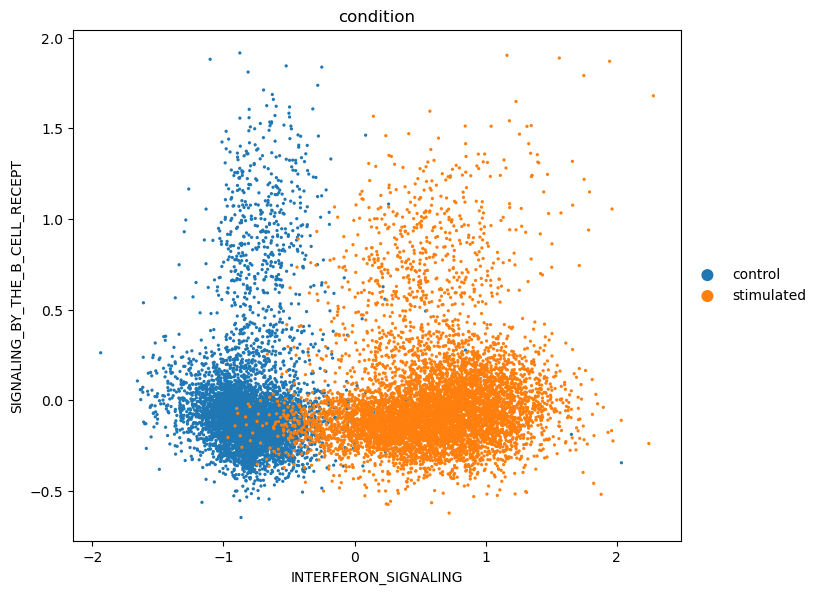

In [12]:
sc.pl.scatter(adata, x='INTERFERON_SIGNALING', y='SIGNALING_BY_THE_B_CELL_RECEPT', color='condition', size=22)

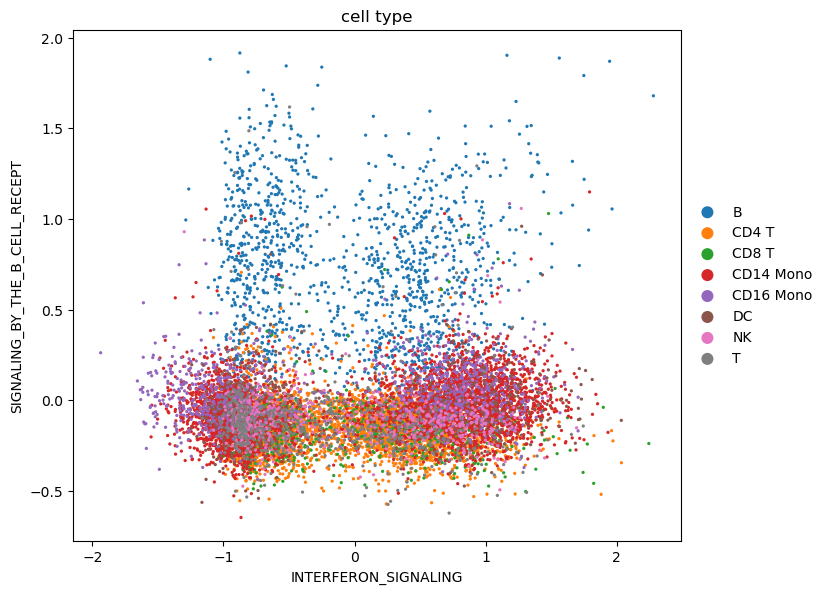

In [13]:
sc.pl.scatter(adata, x='INTERFERON_SIGNALING', y='SIGNALING_BY_THE_B_CELL_RECEPT', color='cell_type', size=22)

In [14]:
intercode.save('kang_last.pt')